In [ ]:
base_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops')
train_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train')
validation_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/validation')
test_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/test')
train_grass_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/grass')
train_soil_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/soil')
train_soybean_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/soybean')
train_weed_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/weed')
validation_grass_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/validation/grass')
validation_soil_dir =('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/validation/soil')
validation_soybean_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/validation/soybean')
validation_weed_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/validation/weed')
test_grass_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/test/grass')
test_soil_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/test/soil')
test_soybean_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/soybean')
test_weed_dir = ('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/train/weed')

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir
        ,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        color_mode="rgb",
        batch_size=92,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 9202 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.


In [ ]:

import math
training_samples =9202
batch_size_training_generator=92
validation_samples =3067
batch_size_validation_generator=31
history = model.fit(
      train_generator,
      steps_per_epoch=math.ceil(training_samples/batch_size_training_generator),  
      epochs=15,
      #verbose=1,
      validation_data = validation_generator,
      validation_steps=math.ceil(validation_samples/batch_size_validation_generator))

Epoch 1/15
101/101 [==============================] - 6406s 63s/step - loss: 1.0128 - accuracy: 0.5756 - val_loss: 0.5480 - val_accuracy: 0.8190
Epoch 2/15
101/101 [==============================] - 90s 889ms/step - loss: 0.5936 - accuracy: 0.7723 - val_loss: 0.3777 - val_accuracy: 0.8604
Epoch 3/15
101/101 [==============================] - 90s 895ms/step - loss: 0.4943 - accuracy: 0.8145 - val_loss: 0.3018 - val_accuracy: 0.8800
Epoch 4/15
101/101 [==============================] - 91s 897ms/step - loss: 0.4108 - accuracy: 0.8508 - val_loss: 0.6849 - val_accuracy: 0.7189
Epoch 5/15
101/101 [==============================] - 91s 904ms/step - loss: 0.3882 - accuracy: 0.8556 - val_loss: 0.2926 - val_accuracy: 0.8885
Epoch 6/15
101/101 [==============================] - 93s 917ms/step - loss: 0.3269 - accuracy: 0.8812 - val_loss: 0.1815 - val_accuracy: 0.9348
Epoch 7/15
101/101 [==============================] - 92s 911ms/step - loss: 0.3251 - accuracy: 0.8912 - val_loss: 0.1985 - val_ac

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
   np_image = Image.open(filename) #Open the image
   np_image = np.array(np_image).astype('float32')/255 #Creates a numpy array as float and divides by 255.
   np_image = transform.resize(np_image, (150, 150, 3)) #Resize a 150x150 con 3 channels
   # We rescale it to (150, 150, 3)
   #Since we trained our model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
   np_image = np.expand_dims(np_image, axis=0) #Insert a new axis that will appear at the axis position in the expanded array shape.
   return np_image

#We show the labels
label_map = (test_generator.class_indices)
print (label_map)

#We take an image of the test whose correct label is weed
image_to_predict = load('/content/drive/MyDrive/Colab Notebooks/Agriculture/weed detection fron crops/test/weed/1002.tif')
result = model.predict(image_to_predict)
result= np.around(result,decimals=3)
result=result*100
print (result)

{'grass': 0, 'soil': 1, 'soybean': 2, 'weed': 3}
[[ 2.4  0.   0.  97.5]]


(150, 150, 3)


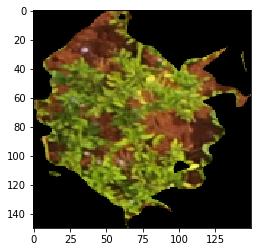

In [ ]:
image_to_predict= np.squeeze(image_to_predict,axis=0)
print(image_to_predict.shape)

from matplotlib import pyplot as plt
plt.imshow(image_to_predict, interpolation='nearest')
plt.show()